In [30]:
import pandas as pd
import numpy as np
import seaborn as sns


In [31]:
# load student performance raw data
df = pd.read_csv('https://raw.githubusercontent.com/akwasianing/Assignment_1/refs/heads/main/student_performance_project/data_raw/raw_studentsperformance_data.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [32]:
# check size of data (number of rows and columns)
df.shape

(1000, 8)

In [33]:
# # Check data types
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [34]:
# check for missing values
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [35]:
# check for duplicate rows
df.duplicated().sum()

0

<Axes: >

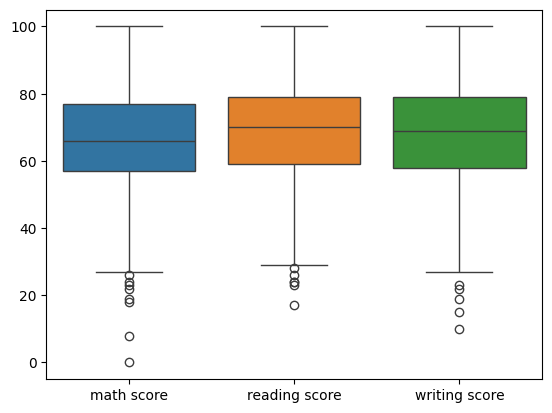

In [36]:
# check for outliers
sns.boxplot(data=df)

In [37]:
# save cleaned data
df.to_csv("cleaned_data.csv", index=False)